# 1470 final project notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
import tensorflow_datasets as tfds
import sklearn as sk
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import assignment
import random

## Data Preprocessing: IAUFD !

In [2]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=[224,224,3], strides=(2,2), padding='same', activation=tf.nn.relu,  kernel_initializer='he_uniform'))
model.add(Conv2D(64,(3,3), strides=(2,2),padding='same', activation=tf.nn.relu, kernel_initializer='he_uniform'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))

model.add(Conv2D(128, (3,3), strides=(2,2), padding='same', activation=tf.nn.relu,  kernel_initializer='he_uniform'))
model.add(Conv2D(128,(3,3), strides=(2,2),padding='same', activation=tf.nn.relu, kernel_initializer='he_uniform'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))

model.add(Conv2D(256, (3,3), strides=(2,2), padding='same', activation=tf.nn.relu,  kernel_initializer='he_uniform'))
model.add(Conv2D(256, (3,3), strides=(2,2), padding='same', activation=tf.nn.relu,  kernel_initializer='he_uniform'))
model.add(Conv2D(256,(3,3), strides=(2,2),padding='same', activation=tf.nn.relu, kernel_initializer='he_uniform'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))

model.add(Conv2D(512, (3,3), strides=(2,2), padding='same', activation=tf.nn.relu,  kernel_initializer='he_uniform'))
model.add(Conv2D(512, (3,3), strides=(2,2), padding='same', activation=tf.nn.relu,  kernel_initializer='he_uniform'))
model.add(Conv2D(512,(3,3), strides=(2,2),padding='same', activation=tf.nn.relu, kernel_initializer='he_uniform'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))

model.add(Conv2D(512, (3,3), strides=(2,2), padding='same', activation=tf.nn.relu,  kernel_initializer='he_uniform'))
model.add(Conv2D(512, (3,3), strides=(2,2), padding='same', activation=tf.nn.relu,  kernel_initializer='he_uniform'))
model.add(Conv2D(512,(3,3), strides=(2,2),padding='same', activation=tf.nn.relu, kernel_initializer='he_uniform'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(4096, activation=tf.nn.relu))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(4096, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [3]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [4]:
imageIndices = list(range(1, 100000))
random.shuffle(imageIndices)

trainingIndices = imageIndices[0: 80000]
testIndices = imageIndices[80001:]

for i in range(0, 80000, 10000):
    currentIndice = trainingIndices[i: i + 10000]

    y_train = np.asarray(assignment.preprocess_labels(currentIndice)).astype("float64")
    x_train = assignment.images_in_array(currentIndice)

    model.fit(x_train, y_train, epochs=10, batch_size=64)
    model.save('/Users/henrydonahue/Desktop/files/brown-cs/cs1470/soccer-image-captioning/code')

2022-12-10 13:58:34.858595: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/10
 19/250 [=>............................] - ETA: 1:51 - loss: 0.3757 - accuracy: 0.2697

KeyboardInterrupt: 

### Sanity check on data

TypeError: Invalid shape (10,) for image data

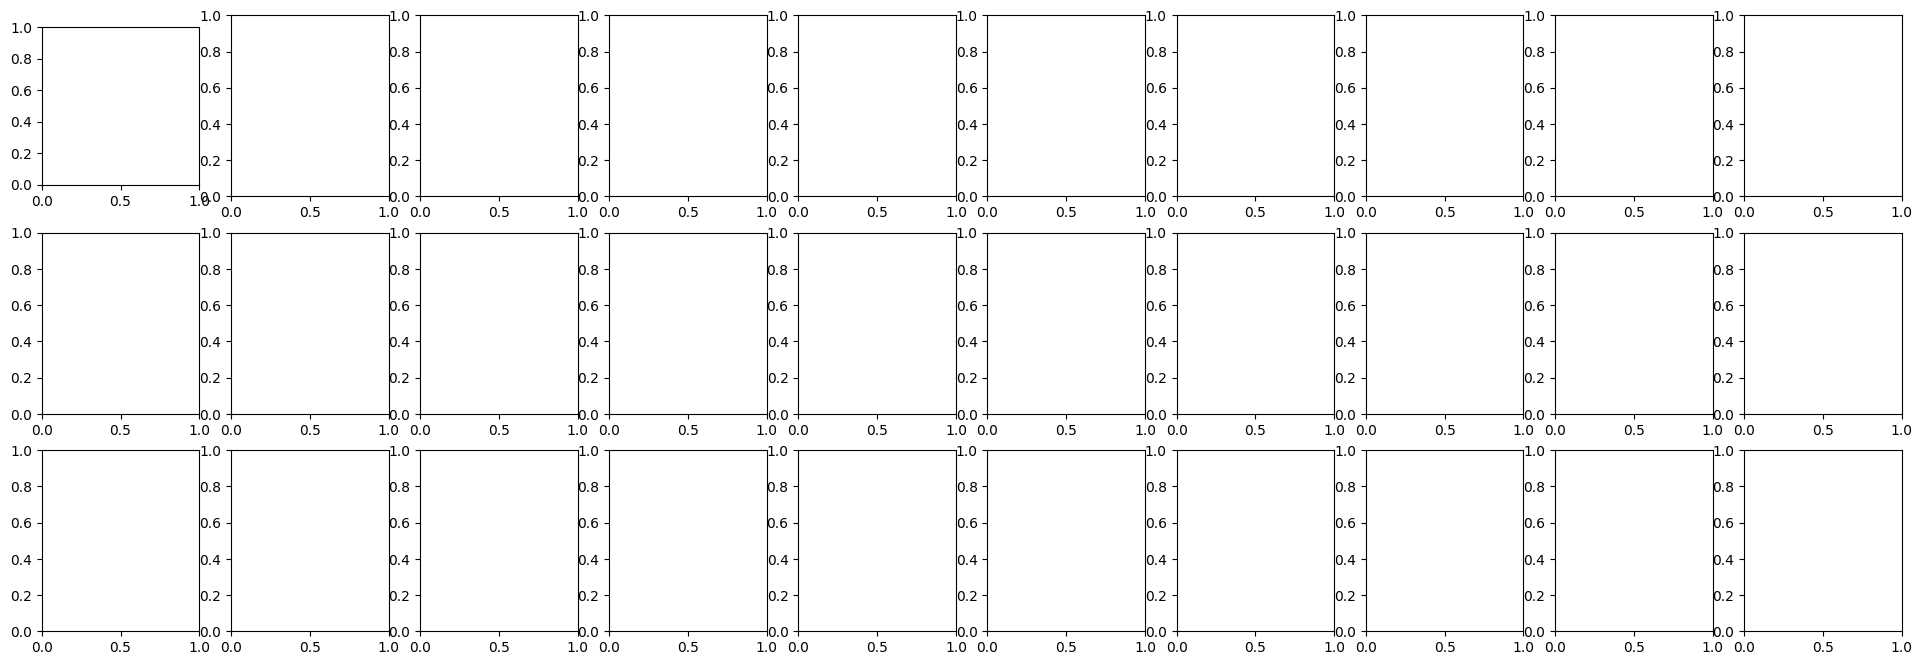

In [ ]:
## You can use any list of 10 indices
sample_image_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
sample_images = tf.cast(tf.gather(y_train, sample_image_indices), tf.float32)
sample_labels = tf.gather(x_train, sample_image_indices)

fig, ax = plt.subplots(3, 10)
fig.set_size_inches(24, 8)

for i in range(10):
    ax[0][i].imshow(sample_images[i]/255., cmap = "Greys")
    ax[1][i].imshow(sample_images[i], cmap = "Greys")
    ax[2][i].imshow(sample_labels[i], cmap = "Greys")

### Confusion matrix

In [ ]:
P1 = np.argmax(cnn_model.predict(X1), -1)
confusion_mtx = tf.math.confusion_matrix(P1, Y1)

P0 = np.argmax(cnn_model.predict(X0), -1)
confusion_mtx = tf.math.confusion_matrix(P0, Y0)
plt.figure(figsize=(12, 9))
plt.imshow(confusion_mtx, cmap='hot', interpolation='nearest')

In [ ]:
P1 = np.argmax(cnn_model.predict(X1), -1)
confusion_mtx = tf.math.confusion_matrix(P1, Y1)
plt.figure(figsize=(12, 9))
plt.imshow(confusion_mtx, cmap='hot', interpolation='nearest')

In [ ]:
fig, ax = plt.subplots(2, 10)
fig.set_size_inches(24, 8)

pred0 = cnn_model.predict(X0[:10])
pred1 = cnn_model.predict(X1[:10])

def p2l(pred):
    return D_info.features['label']._int2str[pred]

for i in range(10):
    ax[0][i].imshow(X0[i], cmap = "Greys")
    ax[1][i].imshow(X1[i], cmap = "Greys")
    ax[1][i].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
    ax[0][i].set_xlabel(f"Pred {p2l(np.argmax(pred0[i], -1))} | {p2l(Y0[i])}")    
    ax[1][i].set_xlabel(f"Pred {p2l(np.argmax(pred1[i], -1))} | {p2l(Y1[i])}")